# Principal Component Regression

In [1]:
import pandas as pd
import numpy as np

### Read Dataset 

In [2]:
hit = pd.read_csv("marketing_campaign.csv", delimiter=';' )
df = hit.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Dataset Preprocessing 

##### ID isn't necessary, remove it

In [3]:
df.drop('ID', axis=1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

##### Check if there are any null values  

In [6]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

##### Drop null values

In [5]:
df = df.dropna()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0


##### Show Categorical Data Description

In [7]:
df.describe(include='O').T

,count,unique,top,freq
Education,2216,5,Graduation,1116
Marital_Status,2216,8,Married,857
Dt_Customer,2216,662,2012-08-31,12


##### Converting dt_Customer into datetime64 data type

In [8]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64')

##### Creating two new columns Date_customer and Month_customer from Dt_Customer column

In [9]:
df['Date_Customer'] = df['Dt_Customer'].dt.day
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Year_Customer'] = df['Dt_Customer'].dt.year

##### Now we can drop Dt_Customer column

In [10]:
df.drop('Dt_Customer', axis=1, inplace=True)

In [11]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date_Customer,Month_Customer,Year_Customer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,4,9,2012
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,8,3,2014
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,3,11,0,21,8,2013
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,3,11,0,10,2,2014
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,3,11,0,19,1,2014


##### Encode Categorical Data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
def encode(dataframe):
    lec = LabelEncoder()
    for j in dataframe.columns:
        if(dataframe[j].dtype == 'object'):
            dataframe[j] = lec.fit_transform(dataframe[j])
            
encode(df)

In [14]:
# Attention to columns of education and marital_status
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date_Customer,Month_Customer,Year_Customer
0,1957,2,4,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,4,9,2012
1,1954,2,4,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,8,3,2014
2,1965,2,5,71613.0,0,0,26,426,49,127,...,0,0,0,0,3,11,0,21,8,2013
3,1984,2,5,26646.0,1,0,26,11,4,20,...,0,0,0,0,3,11,0,10,2,2014
4,1981,4,3,58293.0,1,0,94,173,43,118,...,0,0,0,0,3,11,0,19,1,2014


### Split Dataset

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

In [17]:
x = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Fit Dataset

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

##### Principal component analysis

In [19]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [20]:
X_reduced_train[0:1,:]

array([[-1.75421025e+00, -1.35045530e+00, -1.23013603e-01,
         3.77132133e-01, -1.38458670e+00,  9.25310491e-01,
        -5.61226161e-01, -2.28082522e-01, -9.18088635e-01,
        -5.05281048e-01,  2.79010551e-01, -1.10050615e+00,
         1.26179209e-01, -4.00639664e-02, -5.25920111e-02,
        -1.00999724e+00, -5.74614447e-01, -3.22336559e-01,
        -6.07741238e-01,  4.65944042e-01, -2.67425336e-01,
        -1.47464469e-01,  9.10763427e-01,  3.62033781e-01,
         9.03377405e-02, -3.30806740e-01, -2.32167746e-01,
         4.91925528e-17, -3.57323338e-17]])

In [21]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([24.18, 32.25, 39.21, 45.5 , 50.2 ])

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

##### Fit regression model on reduced train set

In [24]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [25]:
pcr_model.intercept_

0.15280462579839094

In [26]:
pcr_model.coef_

array([ 3.59475557e-02,  4.13140698e-03,  2.50250018e-02,  1.01854893e-01,
        3.94313327e-02,  7.03938187e-02, -2.78607050e-02,  1.49050372e-02,
        3.98203868e-03,  3.72235497e-02,  2.03761926e-02,  3.19809911e-02,
       -2.66021789e-02, -1.90489275e-02,  1.04277231e-02,  4.82009073e-02,
       -1.22170197e-02,  2.53549569e-02, -1.03748044e-02,  6.60641567e-02,
        1.97080061e-02, -1.83733636e-02,  1.13132582e-02,  1.97374283e-02,
       -7.73852123e-02, -5.58210120e-02, -6.17216883e-03,  2.24208309e+09,
        1.44133913e+09])

### Predict

In [27]:
y_pred = pcr_model.predict(X_reduced_train)

In [28]:
y_pred[0:5]

array([ 0.1022089 ,  0.22996304, -0.08575071, -0.05238412,  0.05712224])

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.29005788765994456

In [31]:
df["Response"].mean()

0.15027075812274368

In [32]:
r2_score(y_train, y_pred)

0.35009594873622973

In [33]:
pca2 = PCA()

In [34]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [35]:
y_pred = pcr_model.predict(X_reduced_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.32339549159238923

## Model Tuning

In [37]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.31446311519196074


In [38]:
from sklearn import model_selection

##### Cross Validation

In [39]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [40]:
lm = LinearRegression()

In [41]:
RMSE = []

##### Calculate RMSE for each fold

In [42]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [43]:
import matplotlib.pyplot as plt

##### Observe optimum count of component

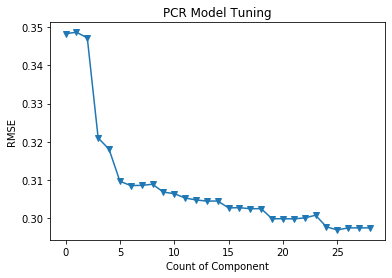

In [44]:
plt.plot(RMSE, '-v')
plt.xlabel('Count of Component')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');

In [45]:
lm = LinearRegression()

In [46]:
pcr_model = lm.fit(X_reduced_train[:,0:25], y_train)

In [47]:
y_pred = pcr_model.predict(X_reduced_train[:,0:25])

In [48]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

0.29130749740533846


In [49]:
y_pred = pcr_model.predict(X_reduced_test[:,0:25])

In [50]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.3203936912620065
